In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [23]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_AN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,NaN,-0.12062,NaN,NaN,...,NaN,-0.40220,0.58984,-0.22145,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,1.00000,-0.45161,NaN,1.00000,NaN,NaN,NaN,0.00000,...,1.00000,0.90695,0.51613,1.00000,NaN,-0.20099,NaN,1.00000,NaN,NaN
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [24]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	34
float64		column 4	0
float64		column 5	52
float64		column 6	0
float64		column 7	69
float64		column 8	18
float64		column 9	69
float64		column 10	34
float64		column 11	69
float64		column 12	18
float64		column 13	69
float64		column 14	0
float64		column 15	34
float64		column 16	18
float64		column 17	69
float64		column 18	0
float64		column 19	52
float64		column 20	0
float64		column 21	52
float64		column 22	34
float64		column 23	69
float64		column 24	18
float64		column 25	51
float64		column 26	0
float64		column 27	34
float64		column 28	0
float64		column 29	69
float64		column 30	17
float64		column 31	69
float64		column 32	34
float64		column 33	69
float64		column 34	52


In [25]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,351.0,317.000000,351.000000,299.000000,351.000000,282.000000,333.000000,282.000000,317.000000,...,300.000000,351.000000,317.000000,351.000000,282.000000,334.000000,282.000000,317.000000,282.000000,299.000000
mean,0.891738,0.0,0.627326,0.044372,0.582843,0.115889,0.554760,0.115602,0.500199,0.180476,...,0.407191,-0.071187,0.554626,-0.069538,0.428084,-0.032721,0.389094,-0.007147,0.389391,0.014559
std,0.311155,0.0,0.498493,0.441435,0.520434,0.460810,0.473138,0.518801,0.518534,0.485402,...,0.565642,0.508495,0.507145,0.550025,0.538321,0.507742,0.550169,0.511432,0.506103,0.459828
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.436360,-0.064735,0.345730,-0.024795,0.236365,-0.055670,0.078192,-0.051440,...,0.000000,-0.332390,0.292080,-0.443165,0.001605,-0.243867,0.000000,-0.231990,0.000000,-0.165350
50%,1.000000,0.0,0.857360,0.016310,0.790740,0.022800,0.709480,0.013730,0.686450,0.016060,...,0.540980,-0.015050,0.721470,-0.017690,0.528090,0.000000,0.470510,0.000000,0.462100,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.966560,0.411760,0.954185,0.510420,...,0.912430,0.156765,1.000000,0.153535,0.909470,0.153593,0.874507,0.191720,0.841603,0.132475
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

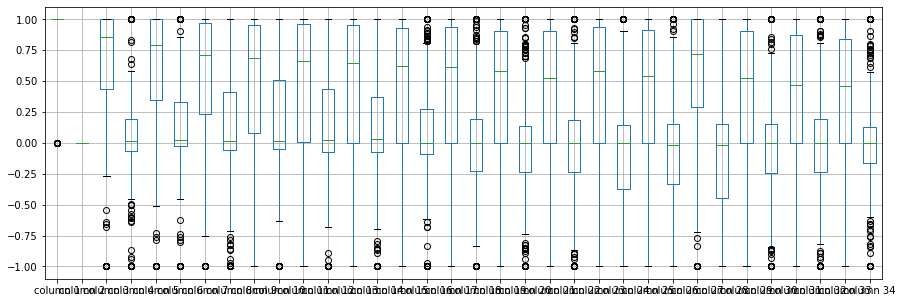

In [26]:
df.boxplot(return_type='axes', figsize=(15,5))

In [27]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.627326
column 4     0.044372
column 5     0.582843
column 6     0.115889
column 7     0.554760
column 8     0.115602
column 9     0.500199
column 10    0.180476
column 11    0.472675
column 12    0.142242
column 13    0.395999
column 14    0.093414
column 15    0.344369
column 16    0.061154
column 17    0.387225
column 18   -0.003617
column 19    0.379446
column 20   -0.024025
column 21    0.350437
column 22    0.010354
column 23    0.407288
column 24   -0.068410
column 25    0.407191
column 26   -0.071187
column 27    0.554626
column 28   -0.069538
column 29    0.428084
column 30   -0.032721
column 31    0.389094
column 32   -0.007147
column 33    0.389391
column 34    0.014559
dtype: float64

In [28]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.313986,-0.006529,0.107019,0.127606,0.125770,0.038675,0.214399,-0.052353,...,0.019698,0.149789,-0.224343,-0.010725,0.052455,-0.111104,0.133578,-0.124640,0.145407,-0.013113
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.313986,NaN,1.000000,0.114670,0.489870,0.053132,0.462639,0.029105,0.519571,-0.032907,...,0.284410,-0.110877,0.072560,0.145308,0.336824,0.027015,0.290107,0.035970,0.325383,-0.002323
column 4,-0.006529,NaN,0.114670,1.000000,-0.042647,-0.190308,-0.154955,0.229671,-0.340810,0.217462,...,-0.112057,-0.236987,-0.053322,0.000743,-0.094568,0.327789,-0.189106,-0.075561,-0.187176,0.052546
column 5,0.107019,NaN,0.489870,-0.042647,1.000000,0.019052,0.640421,-0.014628,0.479063,-0.030581,...,0.296316,-0.012016,0.195558,0.194810,0.301619,0.040077,0.391942,0.060723,0.469560,-0.116486
column 6,0.127606,NaN,0.053132,-0.190308,0.019052,1.000000,-0.029116,0.297911,-0.130650,0.226250,...,-0.176427,0.041787,-0.176781,-0.068775,-0.028213,-0.173407,-0.085732,0.292202,0.020295,0.194662
column 7,0.125770,NaN,0.462639,-0.154955,0.640421,-0.029116,1.000000,-0.218236,0.545762,-0.162067,...,0.357071,0.095543,0.128816,0.161737,0.366137,-0.088716,0.487922,0.004388,0.607756,-0.074211
column 8,0.038675,NaN,0.029105,0.229671,-0.014628,0.297911,-0.218236,1.000000,-0.336769,0.345783,...,-0.153018,-0.128983,-0.245082,0.109066,-0.097501,0.086135,-0.140892,0.158452,-0.201661,0.387098
column 9,0.214399,NaN,0.519571,-0.340810,0.479063,-0.130650,0.545762,-0.336769,1.000000,-0.232602,...,0.357125,0.163057,0.220938,0.134475,0.363897,-0.058514,0.383890,-0.066671,0.439748,-0.139561
column 10,-0.052353,NaN,-0.032907,0.217462,-0.030581,0.226250,-0.162067,0.345783,-0.232602,1.000000,...,-0.282694,-0.047626,-0.237497,0.037404,-0.141668,-0.024010,-0.134380,-0.030013,-0.186385,0.084003


In [29]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [30]:
imputer = md.Midas(layer_structure = [34,34+26,34+26+26,34+26+26+26,34+26+26+26+26,34+26+26+26,34+26+26,34+26,34], vae_layer = False, seed = 260)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 18.082068352472213
Epoch: 1 , loss: 18.06366947719029
Epoch: 2 , loss: 18.026647976466588
Epoch: 3 , loss: 18.120347023010254
Epoch: 4 , loss: 17.816609019324893
Epoch: 5 , loss: 17.858605975196475
Epoch: 6 , loss: 17.904769534156436
Epoch: 7 , loss: 17.567973409380233
Epoch: 8 , loss: 17.895001184372674
Epoch: 9 , loss: 17.667908486865816
Epoch: 10 , loss: 17.677114622933523
Epoch: 11 , loss: 17.644480432782853
Epoch: 12 , loss: 17.40302985055106
Epoch: 13 , loss: 17.22121588389079
Epoch: 14 , loss: 16.321795191083634
Epoch: 15 , loss: 16.001136870611283
Epoch: 16 , loss: 15.643261591593424
Epoch: 17 , loss: 15.866529873439244
Epoch: 18 , loss: 15.411820502508254
Epoch: 19 , loss: 15.585343951270694
Epoch: 20 , loss: 15.637767973400297
Epoch: 21 , loss: 15.568090529668899
Epoch: 22 , loss: 15.50529280162993
Epoch: 23 , loss: 15.689851488385882
Epoch: 24 , loss: 15.497687385195778
Epoch: 25 , loss: 15.

In [31]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [32]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.0
column 2     0.0
column 3     1.0
column 4     1.0
column 5     0.0
column 6     0.0
column 7     0.0
column 8     0.0
column 9    -1.0
column 10   -1.0
column 11    0.0
column 12    0.0
column 13    0.0
column 14    0.0
column 15   -1.0
column 16   -1.0
column 17   -1.0
column 18   -1.0
column 19   -1.0
column 20    1.0
column 21   -1.0
column 22    1.0
column 23    0.0
column 24    0.0
column 25    0.0
column 26    0.0
column 27    1.0
column 28   -1.0
column 29   -1.0
column 30    1.0
column 31   -1.0
column 32    1.0
column 33   -1.0
column 34    1.0
Name: 21, dtype: float64

In [33]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [34]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,0,0.0,0.0,0.000000,0.0,-0.431606,0.000000,-0.330641,0.008177,...,-0.085765,0.0,0.0,0.0,0.035492,0.158293,-0.167667,0.258218,-0.118163,0.361551
3,0,0,0.0,0.0,-0.848487,0.0,-0.561440,1.005001,0.147038,0.000000,...,0.000000,0.0,0.0,0.0,-0.878345,0.000000,-0.143728,0.000000,0.438310,-1.001261
4,0,0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
347,0,0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
348,0,0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
349,0,0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [35]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [36]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [37]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

20.844732021455755

In [38]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [39]:
NRMS=numerator/denominator
NRMS


0.30447970308714795

In [40]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.33266
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [41]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.852430,0.02306,0.833980,-0.377080,1.000000,0.037600,...,0.568110,-0.51171,0.41078,-0.46168,0.212660,-0.340900,0.422670,-0.544870,0.186410,-0.453000
1,1,0,1.00000,-0.18829,0.930350,-0.36156,-0.108680,-0.935970,1.000000,-0.045490,...,-0.203320,-0.26569,-0.20468,-0.18401,-0.190400,-0.115930,-0.166260,-0.062880,-0.137380,-0.024470
2,1,0,1.00000,-0.03365,1.000000,0.00485,0.568394,-0.120620,0.559009,0.020157,...,0.489515,-0.40220,0.58984,-0.22145,0.466492,-0.015357,0.436693,0.016418,0.442287,-0.020829
3,1,0,1.00000,-0.45161,0.151513,1.00000,0.150720,0.005001,0.147038,0.000000,...,1.000000,0.90695,0.51613,1.00000,0.121655,-0.200990,0.113092,1.000000,0.114490,-0.001261
4,1,0,1.00000,-0.02401,0.941400,0.06531,0.921060,-0.232550,0.771520,-0.163990,...,0.032860,-0.65158,0.13290,-0.53206,0.024310,-0.621970,-0.057070,-0.595730,-0.046080,-0.656970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.737390,-0.14706,0.843490,-0.055670,0.904410,-0.046220,...,0.953780,-0.04202,0.83479,0.00123,1.000000,0.128150,0.866600,-0.107140,0.905460,-0.043070
347,1,0,0.95113,0.00419,0.951830,-0.02723,0.934380,-0.019200,0.945900,0.016060,...,0.945200,0.01361,0.93522,0.04925,0.931590,0.081680,0.940660,-0.000350,0.914830,0.047120
348,1,0,0.94701,-0.00034,0.932070,-0.03227,0.951770,-0.034310,0.955840,0.024460,...,0.939880,0.03193,0.92489,0.02542,0.921200,0.022420,0.924590,0.004420,0.926970,-0.005770
349,1,0,0.90608,-0.01657,0.981220,-0.01989,0.956910,-0.036460,0.857460,0.001100,...,0.910500,-0.02099,0.89147,-0.07760,0.829830,-0.172380,0.960220,-0.037570,0.874030,-0.162430


In [42]:
imputations[-1].to_excel("Ionosphere_AN_10(imp).xlsx", index=False, header=False)